# BREAST CANCER PREDICTION

### DATA SET- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [2]:
import numpy as np                   
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# DATA ANALYSIS

In [3]:
df = pd.read_csv('/home/anmol/Downloads/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# ATTRIBUTE INFORMATION:

1) ID number
2) Diagnosis (M = malignant, B = benign)

'3-32'.Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour)

h). concave points (number of concave portions of the contour)

i). symmetry

j). fractal dimension ("coastline approximation" - 1)


Attributes (3-32) are divided into three parts each conataining ten features:


Mean (3-13),

Standard Error(13-23)

Worst(23-32)


# Observations from data frame 

1) There is an id that cannot be used for classificaiton 

2) Diagnosis is our class label 

3) Unnamed: 32 feature includes NaN so we do not need it

In [5]:
class_label=df['diagnosis']
class_label

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [6]:
list = ['Unnamed: 32','id','diagnosis']
x= df.drop(list,axis = 1 )     # x is our clean df
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### class label is stored in class_label field  and rest data is in table named x

Number of Benign:  357
Number of Malignant :  212


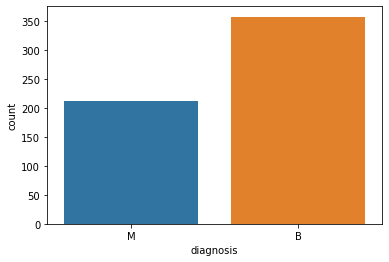

In [7]:
plot1 = sns.countplot(class_label,label="Count")      
B, M = class_label.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)


In [8]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### max value of area_mean = 2501 and compactness_mean is 0.16 there is so much difference in these value area value will overpower value of smoothness so we need to standardize or normalize our data

# Chosing between Standardisation and Normalisation

In [14]:
table = x
data=x
table_std = (table - table.mean()) / (table.std())  #standardisation
table_norm=(data-data.max())/(data.max()-data.min()) #normalisation

(array([-1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2]),
 <a list of 8 Text xticklabel objects>)

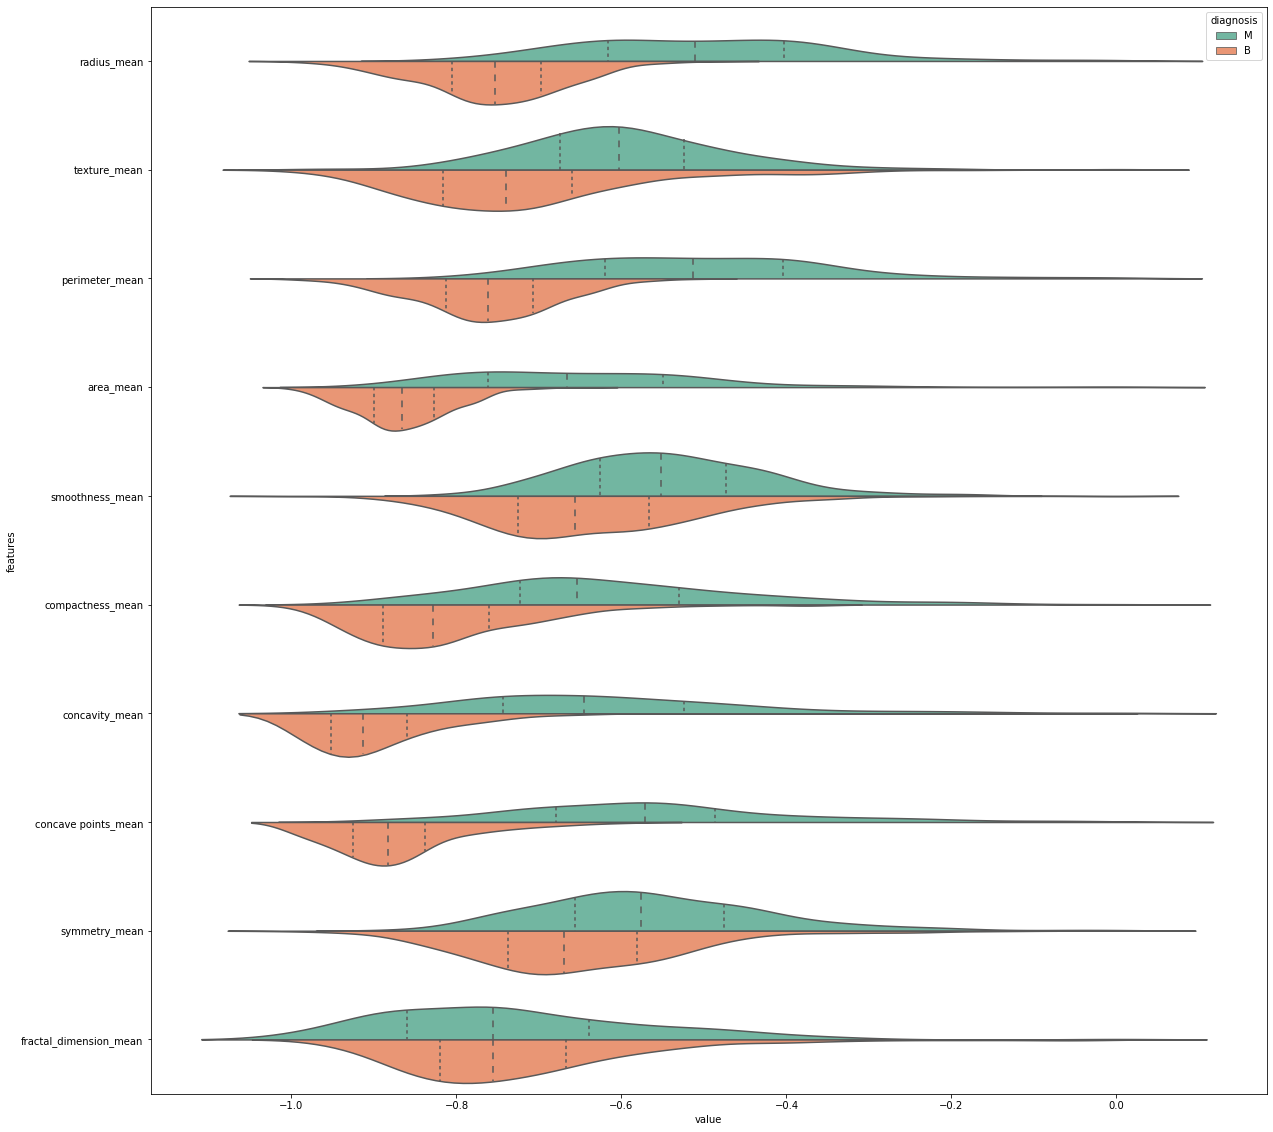

In [15]:
table = pd.concat([class_label,table_norm.iloc[:,0:10]],axis=1)
table = pd.melt(table,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(20,20))

sns.violinplot(y="features", x="value", hue="diagnosis", data=table ,palette="Set2",split=True, inner="quart")
plt.xticks(rotation=0)

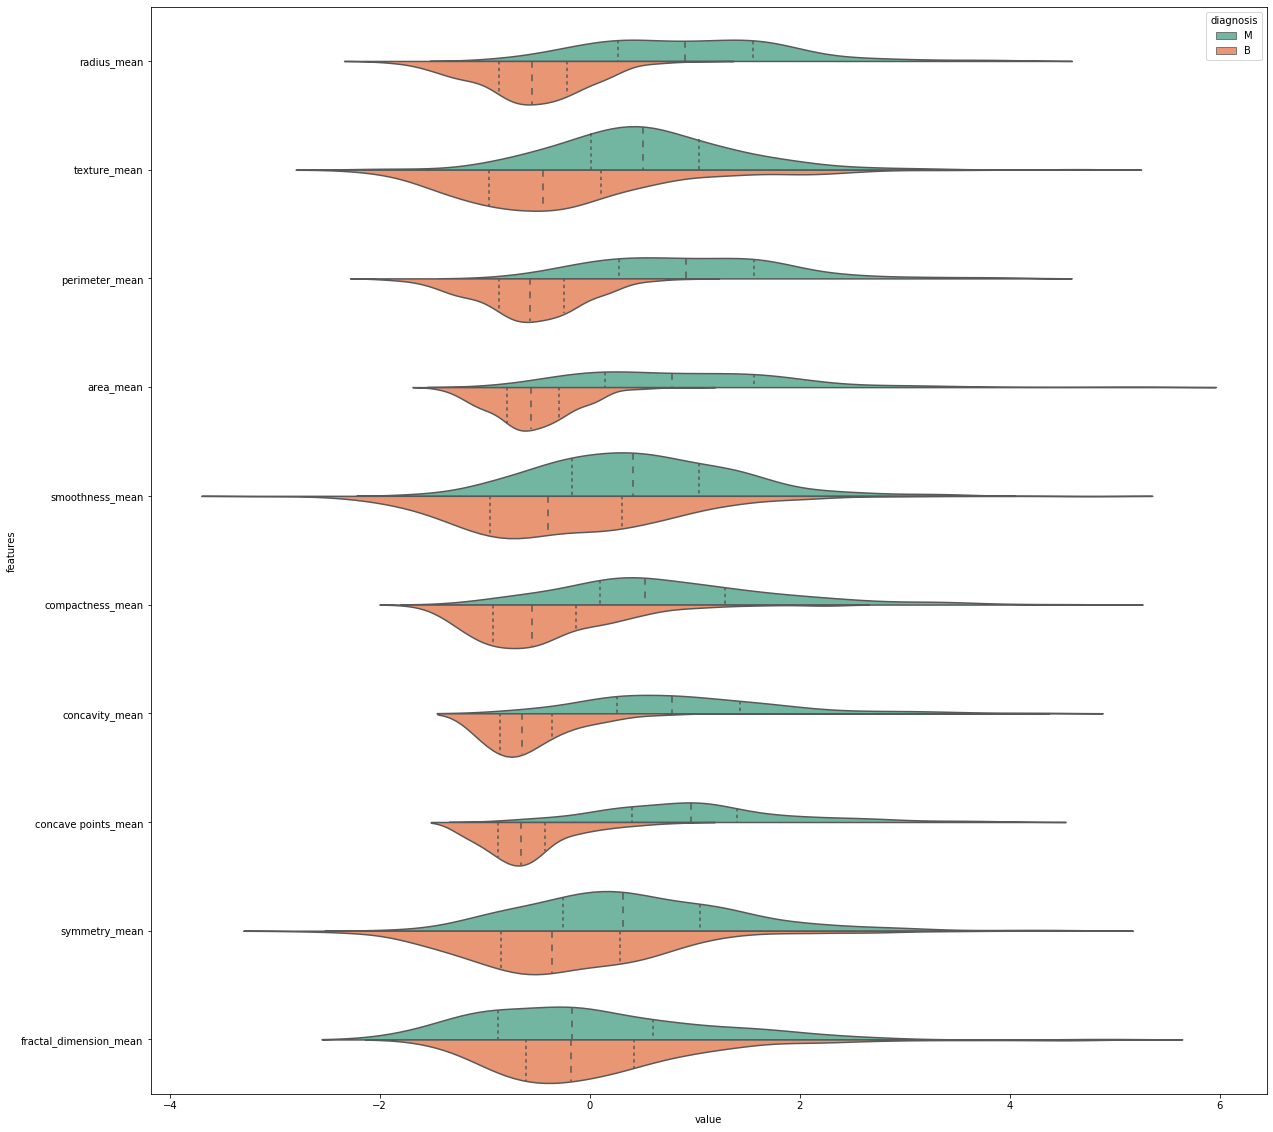

In [16]:
data = pd.concat([class_label,table_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(20,20))
sns.violinplot(y="features", x="value", hue="diagnosis", data=data,palette="Set2",split=True, inner="quart")



#### As on standardisation graphs are showing more uniformity , as compared to normalisation so I am analyzing data on standardizing data

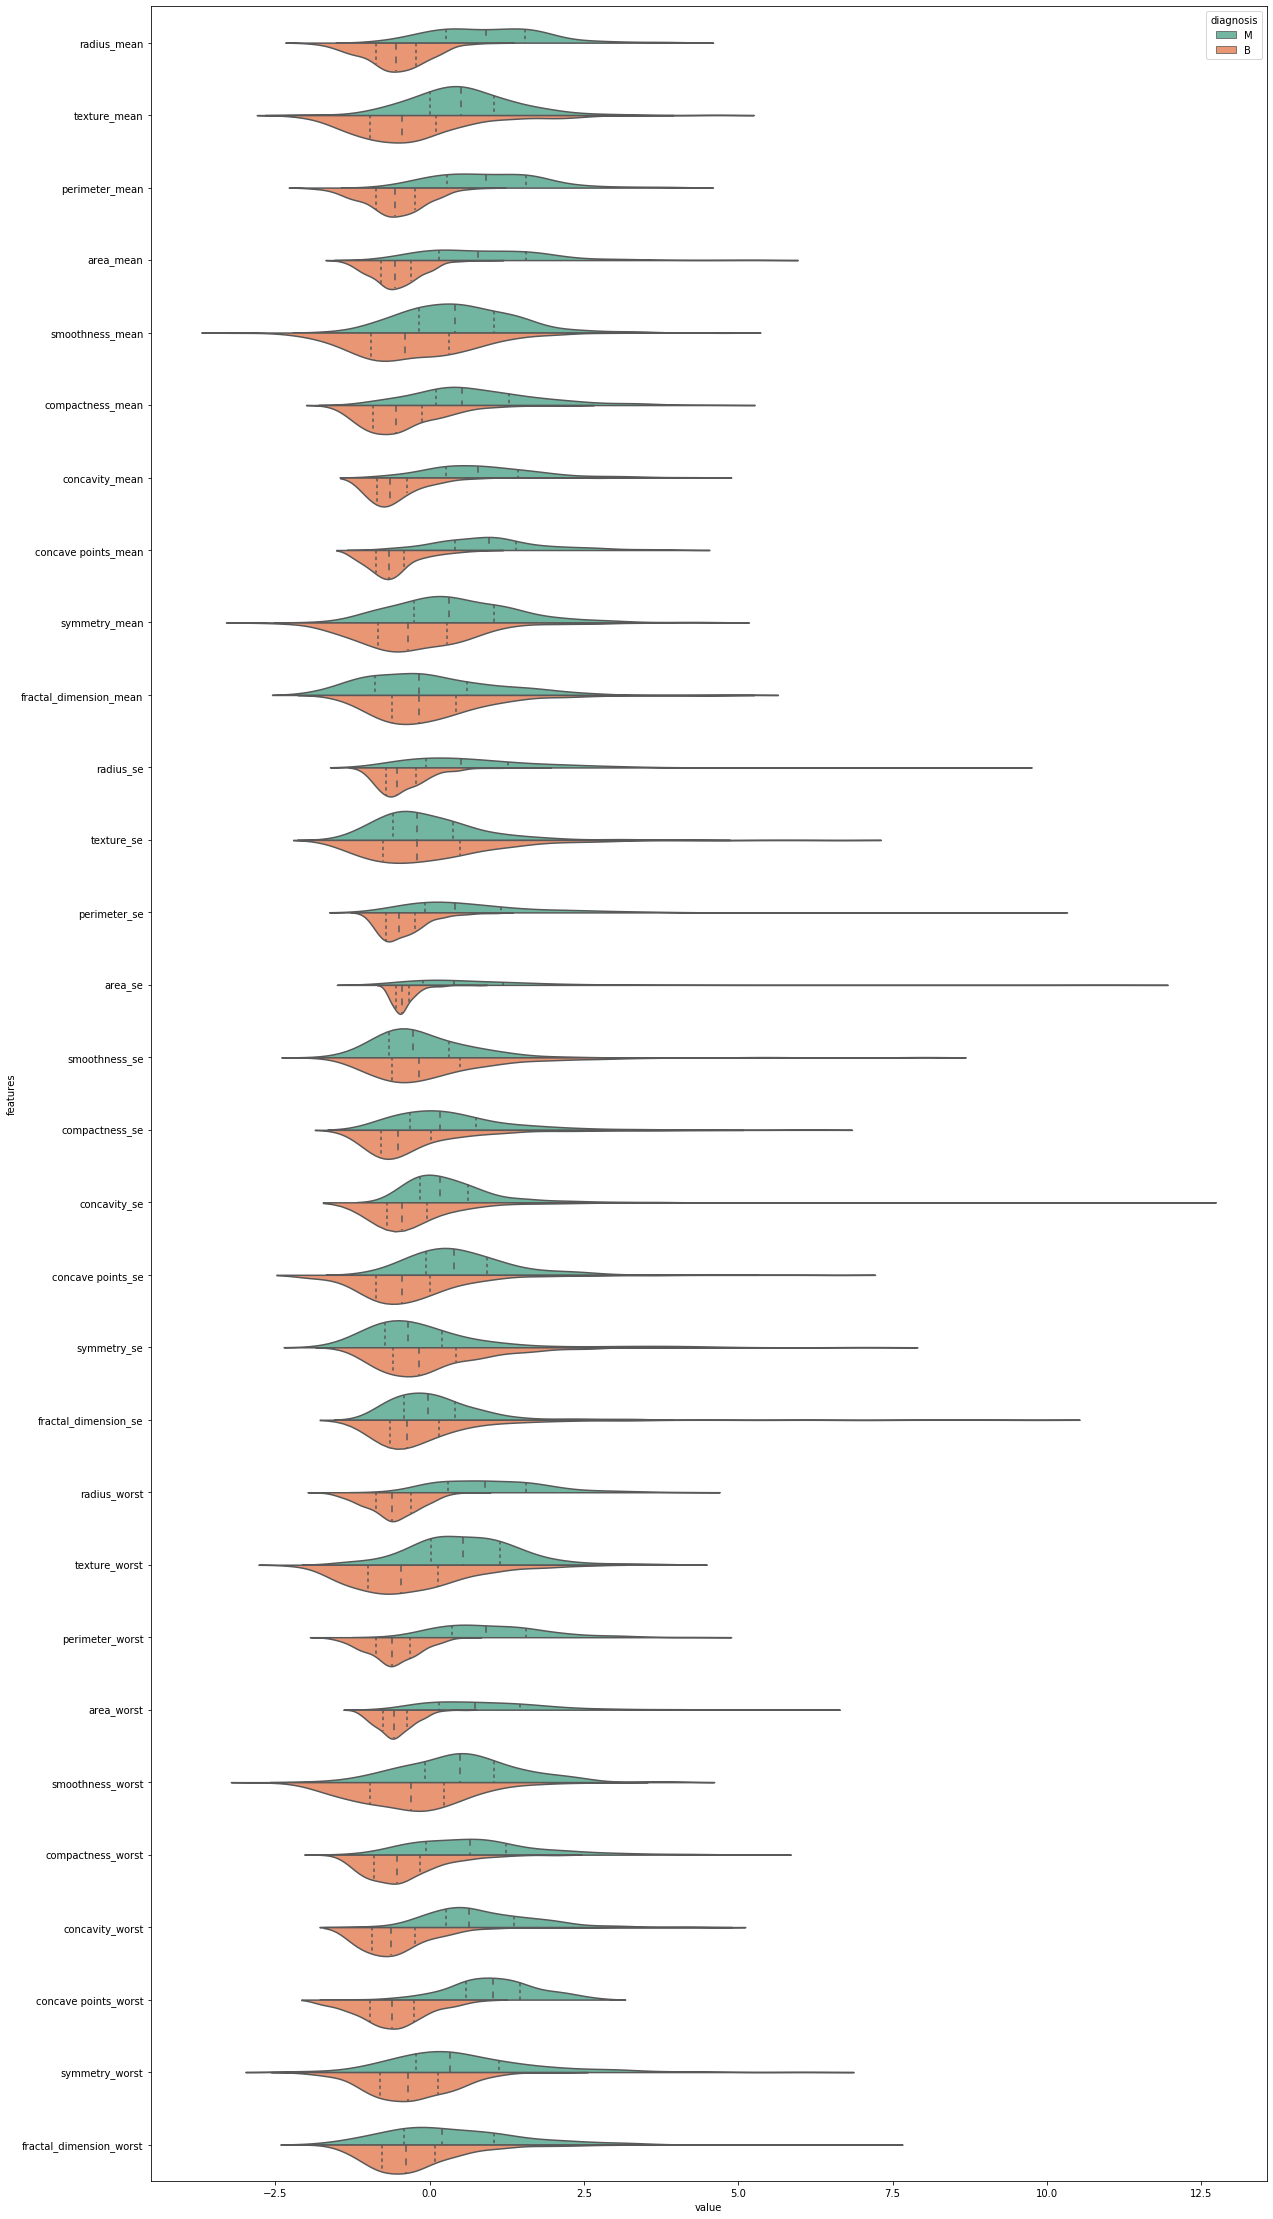

In [17]:
data = pd.concat([class_label,table_std.iloc[:,0:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(20,40))
sns.violinplot(y="features", x="value", hue="diagnosis", data=data,palette="Set2",split=True, inner="quart")


(array([-4., -2.,  0.,  2.,  4.,  6.]), <a list of 6 Text xticklabel objects>)

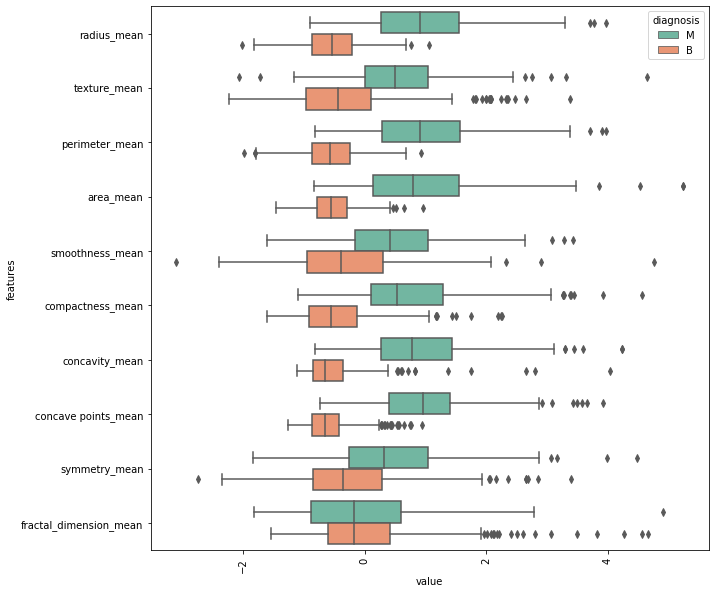

In [49]:
data = pd.concat([class_label,table_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(y="features", x="value", hue="diagnosis", data=data,palette="Set2")

plt.xticks(rotation=90)

## Observation

For example, in texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification.
However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.


# Variance in Data

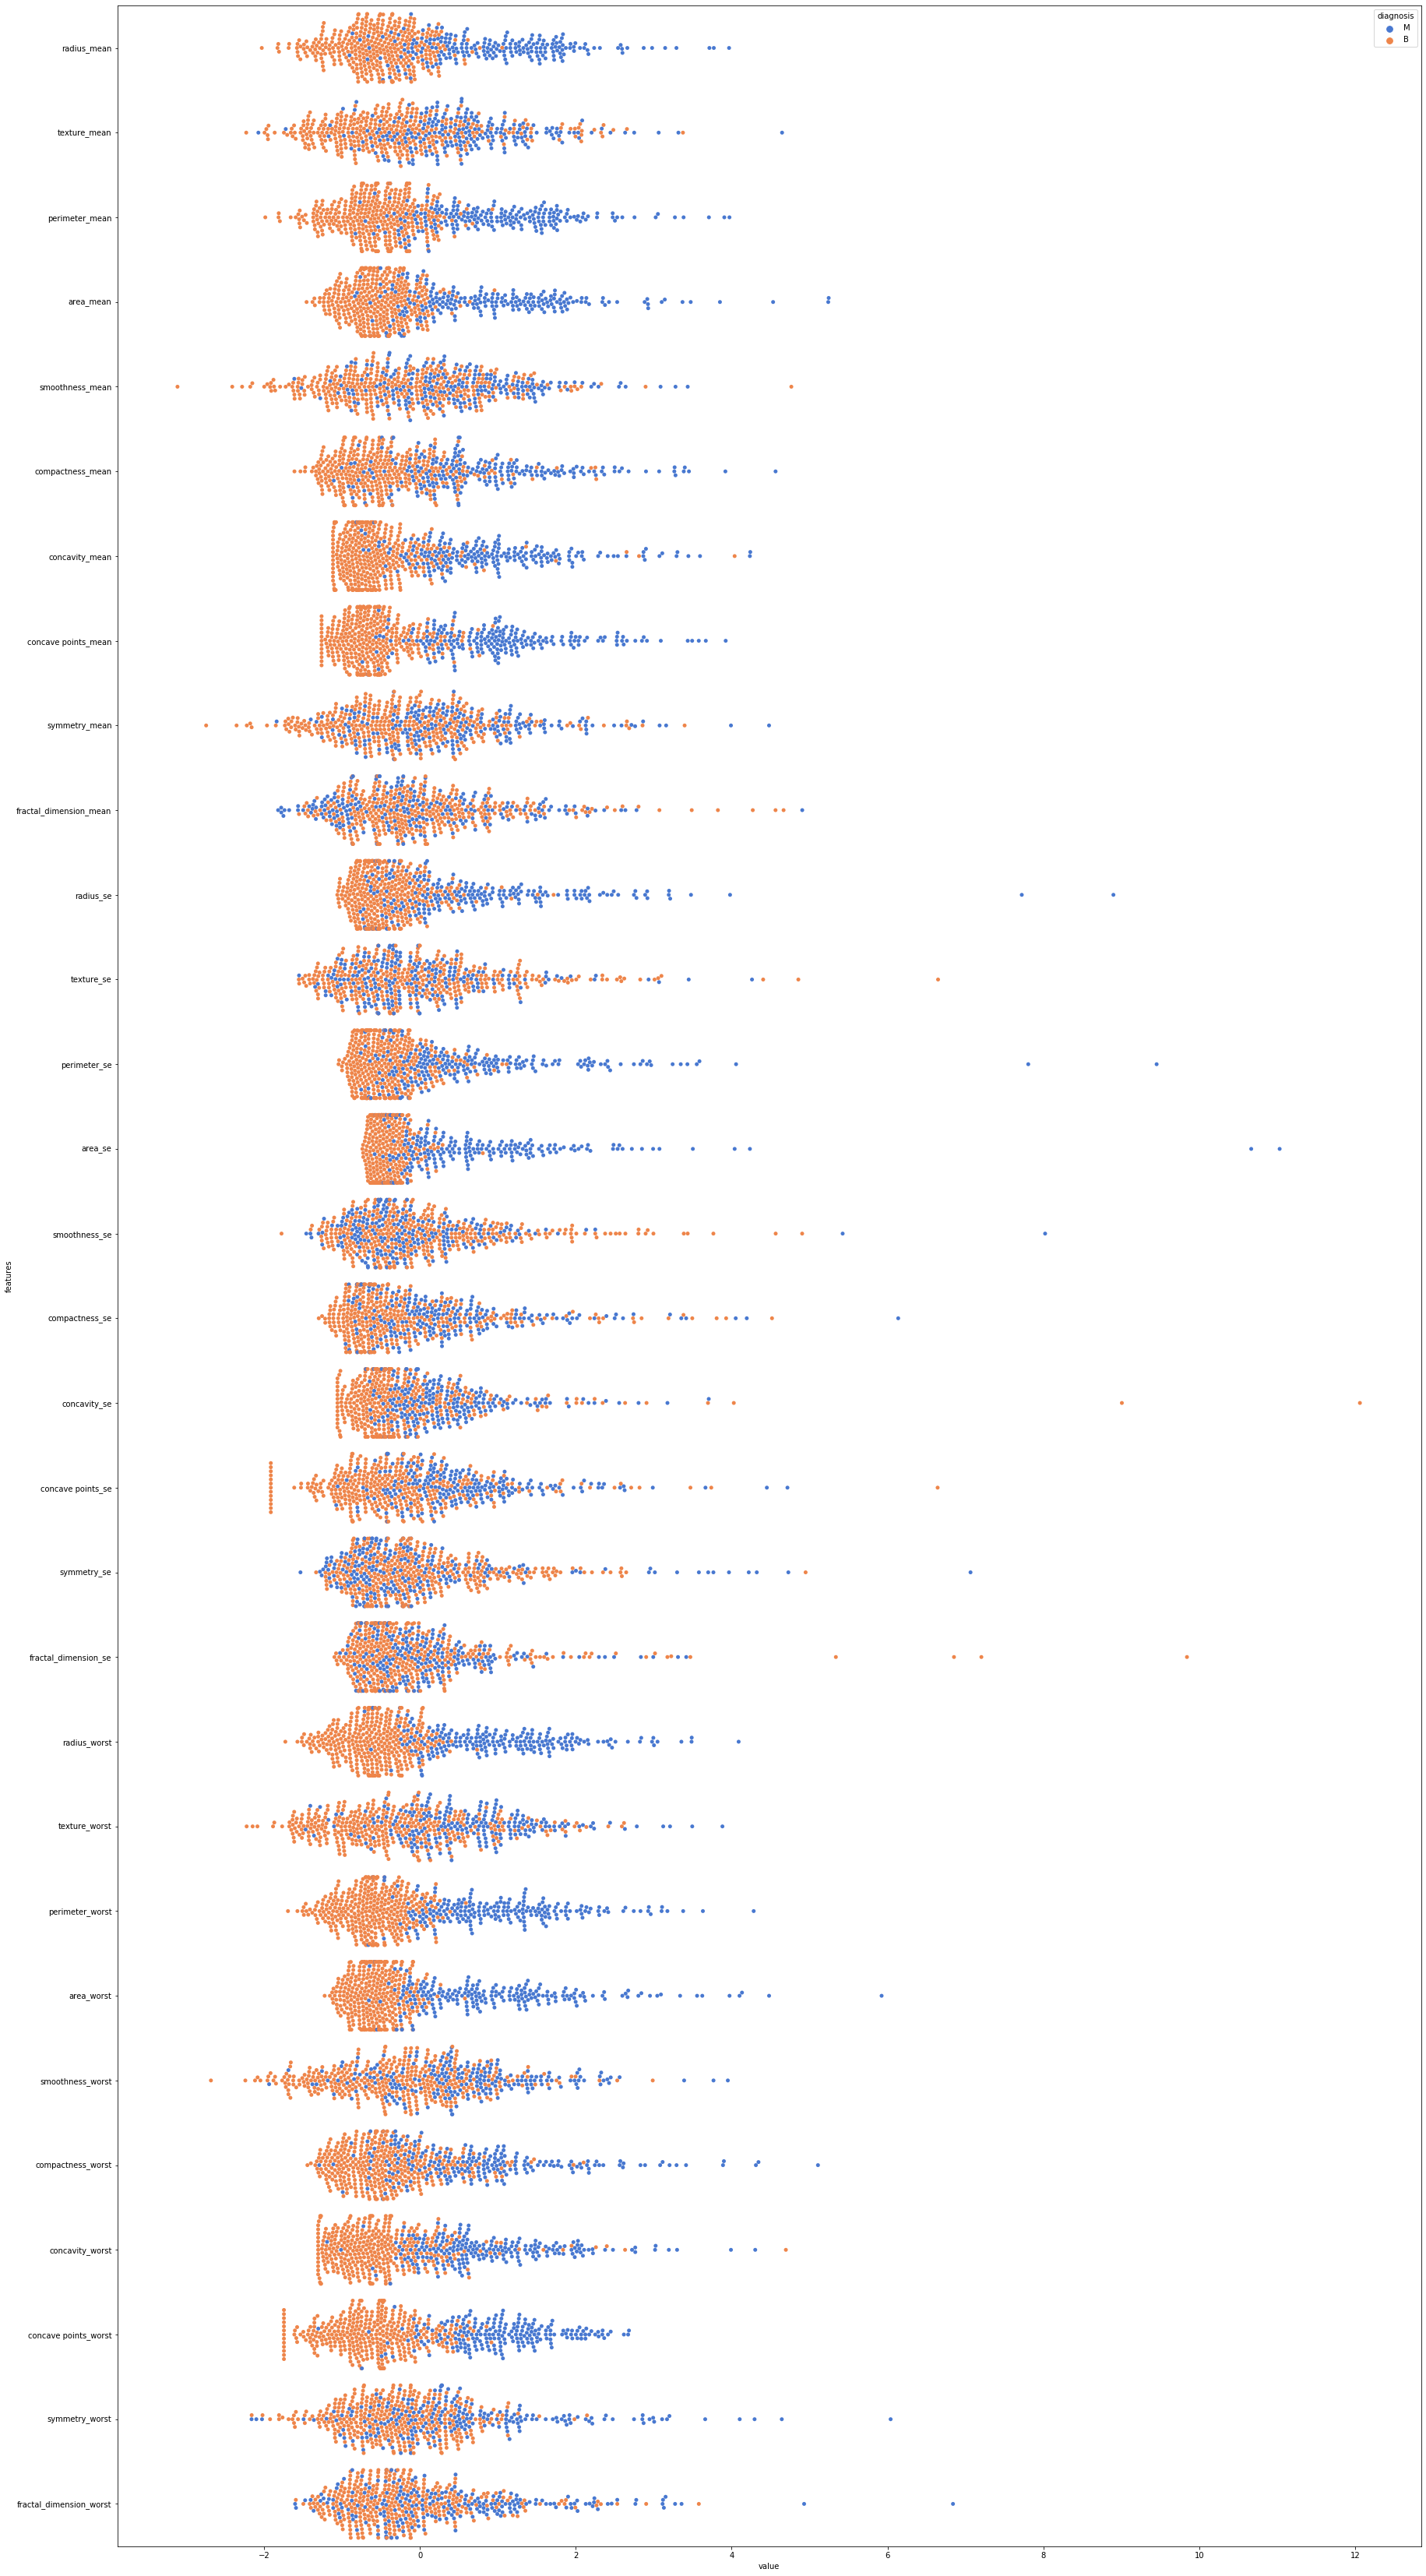

In [18]:

data = pd.concat([class_label,table_std.iloc[:,0:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(30,60))

sns.swarmplot(y="features", x="value", hue="diagnosis", data=data, palette="muted")




## Observation
area_mean , concavity_mean in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, smoothness_se , fractal_dimension_worst in swarm plot  looks like malignant and benign are mixed so it is hard to classfy while using this feature.

# Correlation

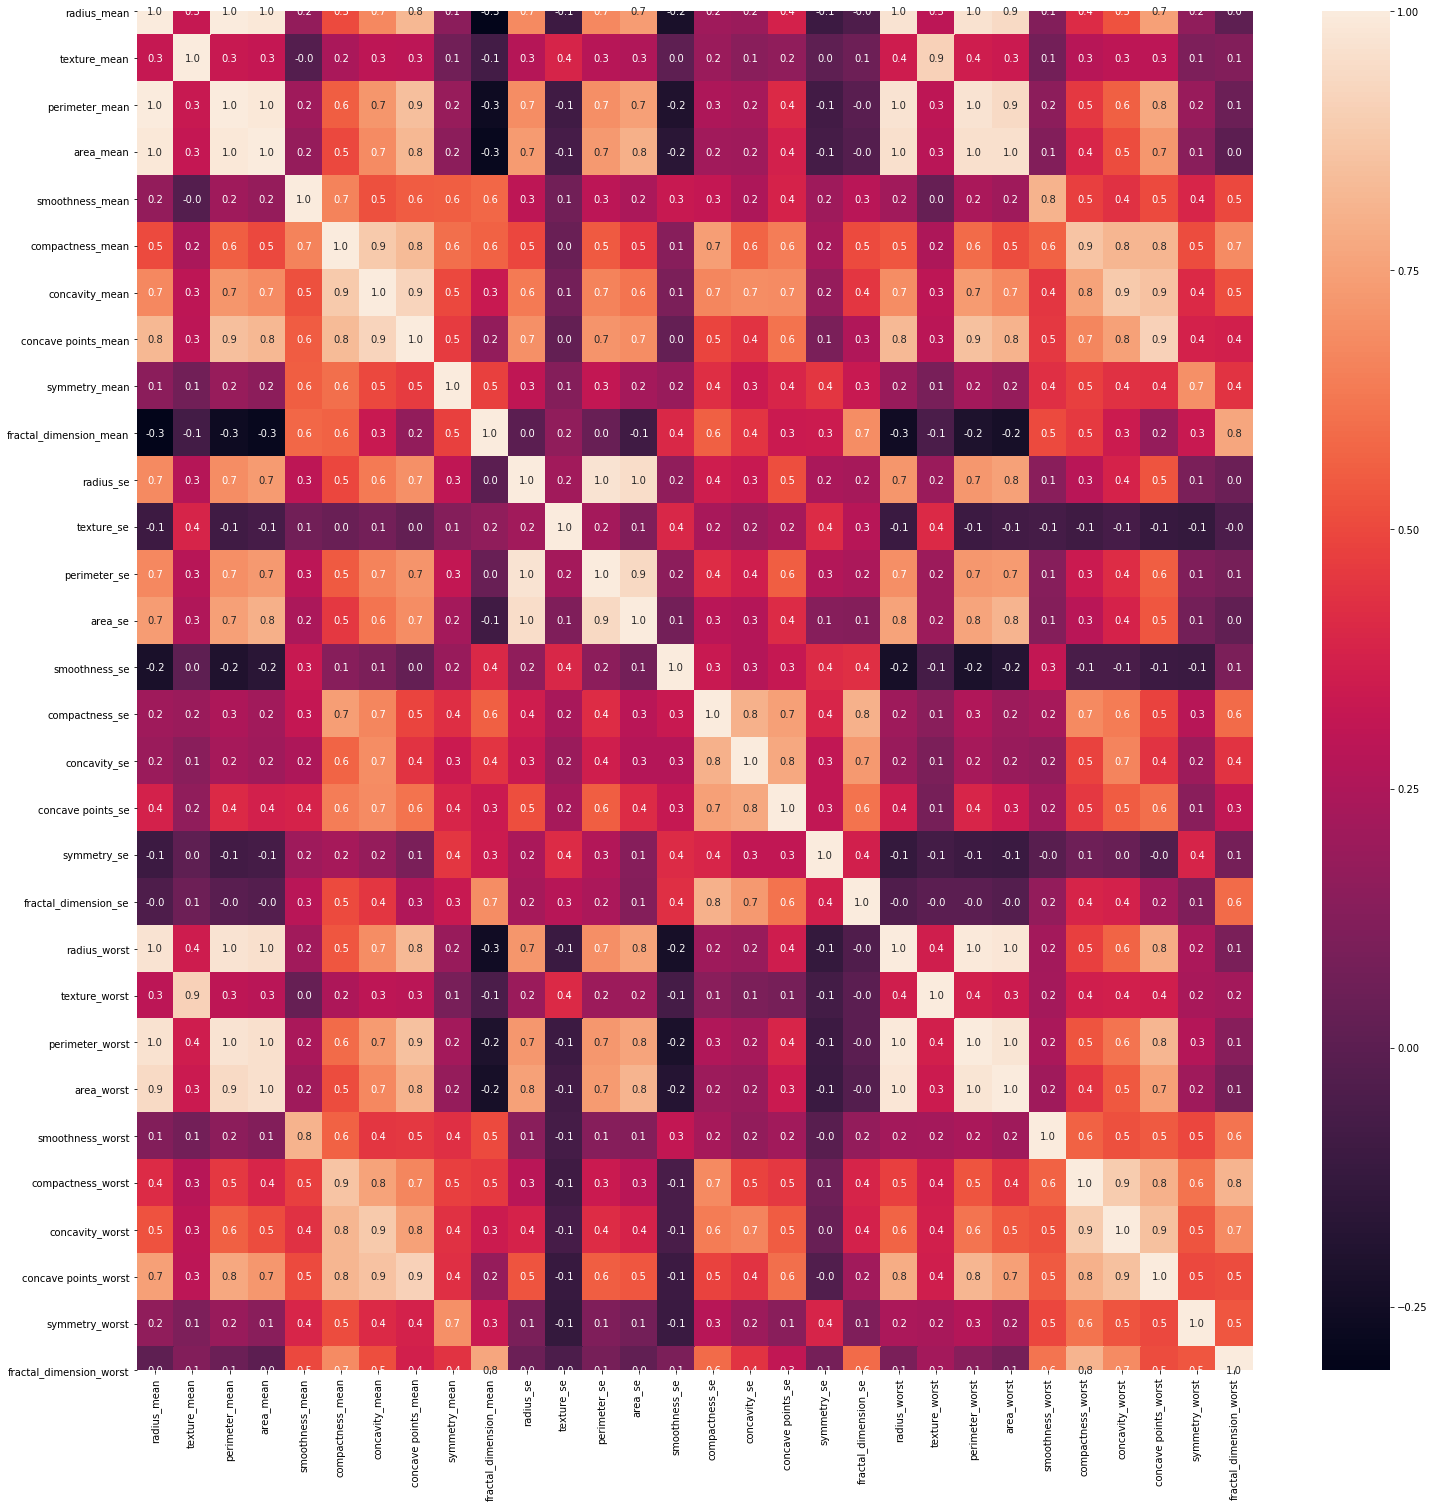

In [9]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(x.corr(), annot=True, fmt= '.1f',ax=ax)

#### it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean.

#### Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

In [12]:
remove = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_mod= x.drop(remove,axis = 1 )        
x_mod.head()


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


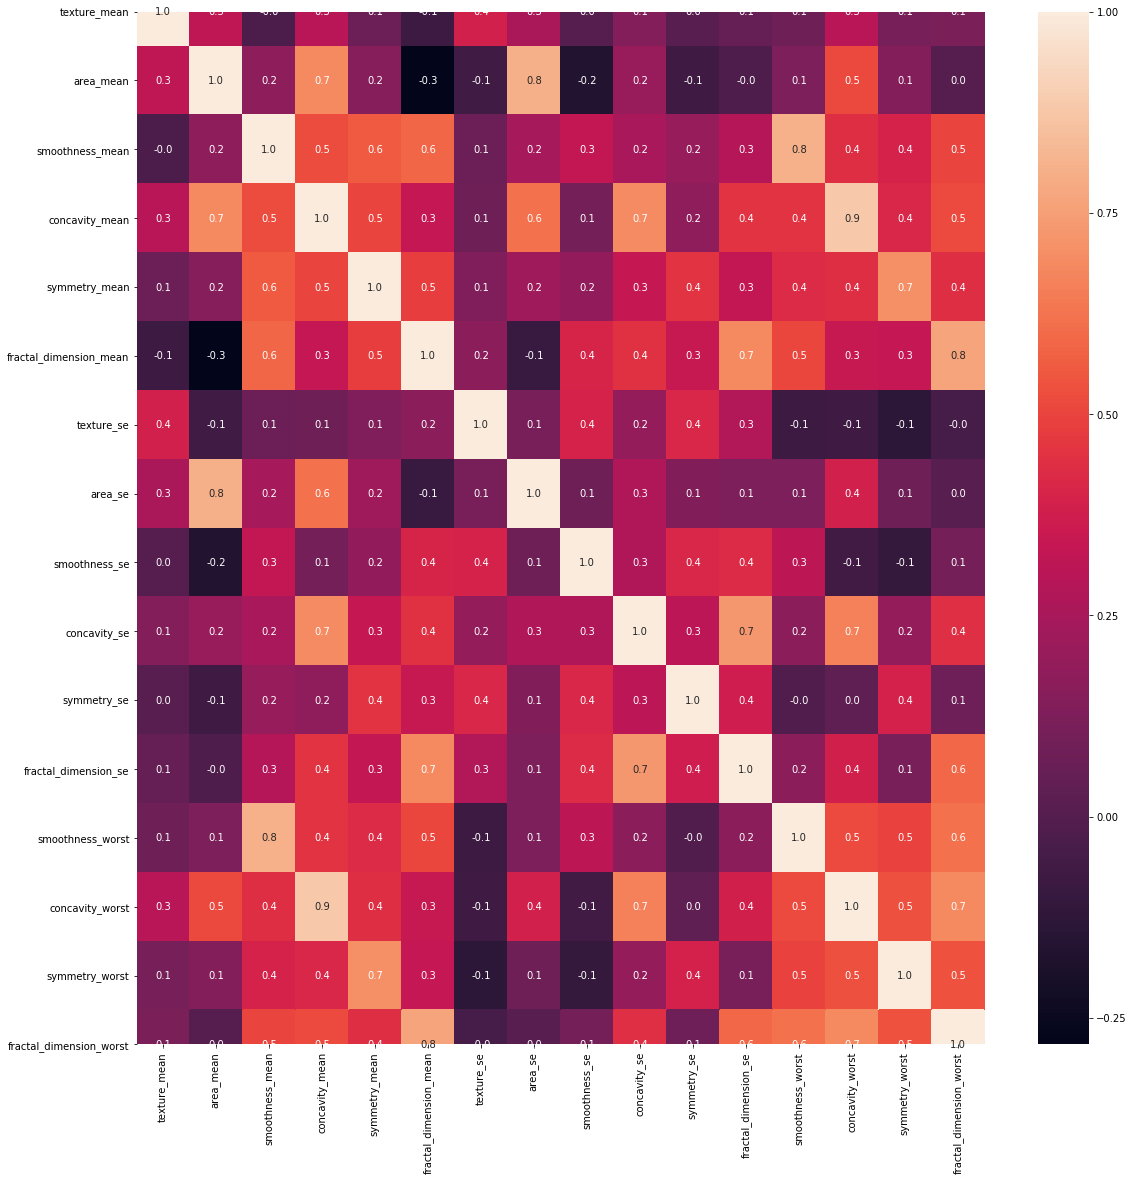

In [13]:
f,ax = plt.subplots(figsize=(19, 19))
sns.heatmap(x_mod.corr(), annot=True, fmt= '.1f',ax=ax)

# Decision Tree Classifier

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_mod, class_label, test_size=0.4)
model=tree.DecisionTreeClassifier()  
dtc = model.fit(x_train,y_train)
ac = accuracy_score(y_test, model.predict(x_test))
print('Accuracy is: ',ac*100,'%')
cv_results = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_results)))

Accuracy is:  92.98245614035088 %
Cross-Validation Score : 90.336%


# Naive Bayes Classifier

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_mod, class_label, test_size=0.4, random_state=1)
model =GaussianNB()      
nbc = model.fit(x_train,y_train)
ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac*100 ,'%')

cv_results = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_results)))

Accuracy is:  93.42105263157895 %
Cross-Validation Score : 93.273%


# Logistic Regression

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_mod, class_label, test_size=0.4, random_state=1)
model =LogisticRegression()      
lrm = model.fit(x_train,y_train)
ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac*100 ,'%')

cv_results = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_results)))

Accuracy is:  92.98245614035088 %
Cross-Validation Score : 91.179%


/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

# Random Forest Classifier

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_mod, class_label, test_size=0.4, random_state=1)
model =RandomForestClassifier()      
rfc = model.fit(x_train,y_train)
ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac*100 ,'%')

cv_results = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_results)))

Accuracy is:  92.10526315789474 %
Cross-Validation Score : 96.193%


/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# SVM

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_mod, class_label, test_size=0.4, random_state=1)
model =SVC()      
sv = model.fit(x_train,y_train)
ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac*100,'%')



cv_results = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_results)))

Accuracy is:  64.91228070175438 %
Cross-Validation Score : 61.306%


/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/

# Univariate feature selection

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [27]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.56694336e+01 3.67335100e+04 7.51204236e-02 1.21526245e+01
 1.56692855e-01 1.16941768e-03 6.41494973e-02 5.90929401e+03
 7.74728367e-03 5.83042442e-01 3.77762411e-03 6.40945022e-04
 2.35232239e-01 2.60310295e+01 8.37333218e-01 1.32705981e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


### Best 5 feature to classify is that area_mean, area_se, texture_mean, concavity_worst and concavity_mean.

In [28]:
train = select_feature.transform(x_train)
test = select_feature.transform(x_test)



# Decision Tree on Best 5 features

In [29]:
clf_2 = tree.DecisionTreeClassifier()      
clr_2 = clf_2.fit(train,y_train)
ac_2 = accuracy_score(y_test,clf_2.predict(test))
print('Accuracy is: ',ac_2*100,'%')

Accuracy is:  90.78947368421053 %


# Naive Bayes on best 5 features

In [30]:
clf_2 = GaussianNB()      
clr_2 = clf_2.fit(train,y_train)
ac_2 = accuracy_score(y_test,clf_2.predict(test))
print('Accuracy is: ',ac_2*100,'%')

Accuracy is:  91.66666666666666 %


# Logistic Regression on best 5 features

In [31]:
clf_2 = LogisticRegression()      
clr_2 = clf_2.fit(train,y_train)
ac_2 = accuracy_score(y_test,clf_2.predict(test))
print('Accuracy is: ',ac_2*100,'%')

Accuracy is:  90.78947368421053 %


/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest Classifier on best 5 features

In [32]:
clf_2 = RandomForestClassifier()      
clr_2 = clf_2.fit(train,y_train)
ac_2 = accuracy_score(y_test,clf_2.predict(test))
print('Accuracy is: ',ac_2*100,'%')

Accuracy is:  92.10526315789474 %


/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Recursive feature elimination (RFE) with random forest

In [33]:
from sklearn.feature_selection import RFE       
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5, step=30)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_se',
       'concavity_worst'],
      dtype='object')


/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Recursive feature elimination with cross validation and decision tree classification

In [34]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=tree.DecisionTreeClassifier(), cv=5,scoring='accuracy')  
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 10
Best features : Index(['texture_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_mean',
       'area_se', 'symmetry_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


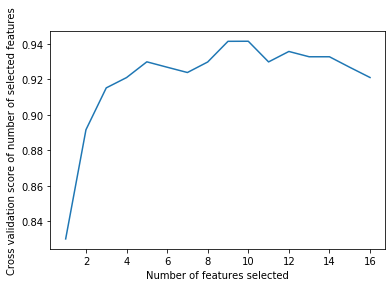

In [35]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Recursive feature elimination with cross validation and Logistic Regression

In [36]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(), cv=5,scoring='accuracy')  
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

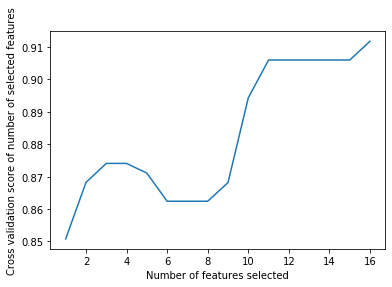

In [37]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Recursive feature elimination with cross validation and random forest classification

In [38]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=RandomForestClassifier(), cv=5,scoring='accuracy')  
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/anmol/anaconda3/lib/python3.7/site-package

Optimal number of features : 13
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'area_se', 'smoothness_se', 'concavity_se',
       'symmetry_se', 'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


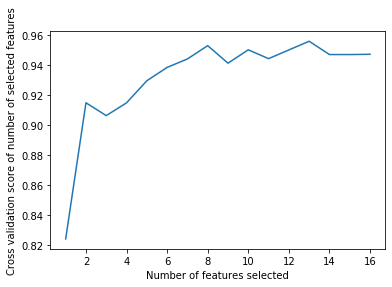

In [39]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()